In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df1 = pd.read_csv('../dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_01_DEMO.csv')
df2 = pd.read_csv('../dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_02_PDDE.csv')
df3 = pd.read_csv('../dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_03_COP_U.csv')
df4 = pd.read_csv('../dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_04_PD_CLAC.csv')
df5 = pd.read_csv('../dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_05_BR.csv')
df6 = pd.read_csv('../dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_06_LPAY.csv')

/tmp/ipykernel_122665/2375239931.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('../dataset/LPOINT_BIG_COMP/LPOINT_BIG_COMP_02_PDDE.csv')


In [3]:
## data 1, 2,4,5 합치기
data12 = pd.merge(df1,df2,on='cust')
data124 = pd.merge(data12,df4, on='pd_c')
data1245 = pd.merge(data124,df5, on='br_c')

In [5]:
display(data1245)

,cust,ma_fem_dv,ages,zon_hlv_x,rct_no,chnl_dv,cop_c_x,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm,cop_c_y,zon_hlv_y,zon_mcls
0,M000034966,여성,40대,Z07,A01016688590,1,A01,A010045,PD0777,20210116,18,59000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화,A01,Z16,Z16003
1,M000034966,여성,40대,Z07,A01016688590,1,A01,A010045,PD0777,20210116,18,19000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화,A01,Z16,Z16003
2,M001729158,여성,40대,Z03,A01431235584,1,A01,A010045,PD0777,20211111,13,35000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화,A01,Z16,Z16003
3,M001729158,여성,40대,Z03,A01431235584,1,A01,A010045,PD0777,20211111,13,35000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화,A01,Z16,Z16003
4,M002238144,여성,20대,Z16,A01205299558,1,A01,A010045,PD0777,20210601,14,14000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화,A01,Z16,Z16003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953237,M309144365,여성,50대,Z14,A05004244920,1,A05,A050377,PD1676,20211121,18,37900.0,1,공유기,컴퓨터,컴퓨터주변기기,A05,Z14,Z14004
3953238,M611231289,남성,50대,Z14,A05002562450,1,A05,A050372,PD1676,20210720,13,25500.0,1,공유기,컴퓨터,컴퓨터주변기기,A05,Z14,Z14004
3953239,M562358473,여성,40대,Z03,A05001644283,1,A05,A050434,PD0552,20210508,12,38000.0,1,전기프라이팬,생활/주방가전,주방가전,A05,Z03,Z03004
3953240,M947674013,남성,50대,Z06,A04033564464,1,A04,A044321,PD0521,20210502,18,3500.0,1,택배,생활/렌탈서비스,생활서비스,A04,Z06,Z06013


In [6]:
# 칼럼 이름 바꾸기
data1245.rename(columns = {'zon_hlv_x':'live_zon','zon_hlv_y':'shop_zon'},inplace=True)
# 필요없는 칼럼 삭제
data1245_drop = data1245.drop(['rct_no','chnl_dv','pd_c','cop_c_y','pd_nm','clac_hlv_nm','de_dt','cop_c_x'],axis=1)


In [ ]:
# 라벨 인코더
from sklearn.preprocessing import LabelEncoder

#성별
le = LabelEncoder()
sex = le.fit_transform(data1245_drop['ma_fem_dv'])
data1245_drop['ma_fem_dv'] = sex

# ages
le2 = LabelEncoder()
ages = le2.fit_transform(data1245_drop['ages'])
le2.classes_
data1245_drop['ages'] = ages

# cust
le3 = LabelEncoder()
cust = le3.fit_transform(data1245_drop['cust'])
data1245_drop['cust'] = cust

# zone
le4 = LabelEncoder()
live_zon = le4.fit_transform(data1245_drop['live_zon'])
shop_zon = le4.fit_transform(data1245_drop['shop_zon'])
data1245_drop['live_zon'] = live_zon
data1245_drop['shop_zon'] = shop_zon

# clac_mcls_nm
le5 = LabelEncoder()
clac_mcls_nm = le5.fit_transform(data1245_drop['clac_mcls_nm'])
data1245_drop['clac_mcls_nm'] = clac_mcls_nm

# zon_mcls
le6 = LabelEncoder()
zon_mcls = le6.fit_transform(data1245_drop['zon_mcls'])
data1245_drop['zon_mcls'] = zon_mcls

display(data1245_drop)

,cust,ma_fem_dv,ages,live_zon,br_c,de_hr,buy_am,buy_ct,clac_mcls_nm,shop_zon,zon_mcls
0,0,1,2,6,A010045,18,59000.0,1,54,15,215
1,0,1,2,6,A010045,18,19000.0,1,54,15,215
2,40,1,2,2,A010045,13,35000.0,1,54,15,215
3,40,1,2,2,A010045,13,35000.0,1,54,15,215
4,54,1,0,15,A010045,14,14000.0,1,54,15,215
...,...,...,...,...,...,...,...,...,...,...,...
3953237,8077,1,3,13,A050377,18,37900.0,1,314,13,203
3953238,15947,0,3,13,A050372,13,25500.0,1,314,13,203
3953239,14703,1,2,2,A050434,12,38000.0,1,288,2,22
3953240,24744,0,3,5,A044321,18,3500.0,1,134,5,69


In [ ]:

# training data set
t_data = data1245_drop['br_c'].values.reshape(-1,1)
x_data = data1245_drop.drop(['br_c'],axis=1)

# t_data label
le_t = LabelEncoder()
t_data_label = le_t.fit_transform(t_data)
t_data = t_data_label.reshape(-1,1)
display(t_data)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[  44],
       [  44],
       [  44],
       ...,
       [6748],
       [4989],
       [6668]])

In [ ]:
# training, test data split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(x_data,t_data,test_size=0.2,random_state=42)

In [ ]:
# scaler
# robust scaler
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
robust_scaler.fit(x_train)
x_train_sclaer = robust_scaler.transform(x_train)
x_test_scaler = robust_scaler.transform(x_test)

In [ ]:
# 모델 학습
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=3, random_state=0)

model.fit(x_train[:85000], y_train[:85000])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(n_estimators=3, random_state=0)

In [ ]:
print(model.score(x_train[:20000], y_train[:20000])) 

0.92355


In [ ]:
print(model.score(x_test[:20000], y_test[:20000])) 

0.6241


In [6]:
df2

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1
...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1


In [11]:
df5

,br_c,cop_c,zon_hlv,zon_mcls
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005
...,...,...,...,...
8803,E010040,E01,Z17,Z17024
8804,E010041,E01,Z16,Z16005
8805,E010042,E01,Z17,Z17021
8806,E010043,E01,Z10,Z10035


In [ ]:
df_concat_02_03 = pd.concat([df2, df3])
df_02_03_05 = pd.merge(df_concat_02_03, df5, on='br_c')

In [26]:
df_02_03_05['zon_mcls'].isna().sum()

0

In [44]:
df = df_02_03_05[['cop_c_x', 'zon_mcls']]
df.to_csv('test1234.csv')

NameError: name 'df_02_03_05' is not defined

In [2]:
df = pd.read_csv('./test1234.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df

,cop_c_x,zon_mcls
0,A01,Z10042
1,A01,Z10042
2,A01,Z10042
3,A01,Z10042
4,A01,Z10042
...,...,...
4201486,D01,Z10026
4201487,D02,Z01005
4201488,D02,Z01005
4201489,D02,Z01005


In [4]:
# zon_mcls
from sklearn.preprocessing import LabelEncoder, StandardScaler

le_zon = LabelEncoder()
le_zon.fit(df['cop_c_x'])
df['cop_c_x'] = le_zon.transform(df['cop_c_x'])

# cop_c_x
le_zon.fit(df['zon_mcls'])
df['zon_mcls'] = le_zon.transform(df['zon_mcls'])

In [ ]:
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)

In [4]:
df['cop_c_x'].nunique()

11

In [34]:
df = df.sample(frac=1).reset_index(drop=True)

In [35]:
df_test = df[:30000]

In [38]:
from sklearn.cluster import DBSCAN

# epsilon, 최소 샘플 개수 설정
model = DBSCAN(eps=0.5, min_samples=3)

# 군집화 모델 학습 및 클러스터 예측 결과 반환
model.fit(df_test)

DBSCAN(min_samples=3)

In [39]:
df_test['cluster'] = model.fit_predict(df_test)

/tmp/ipykernel_7984/4212248106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['cluster'] = model.fit_predict(df_test)


In [40]:
df_test['cluster'].nunique()

613

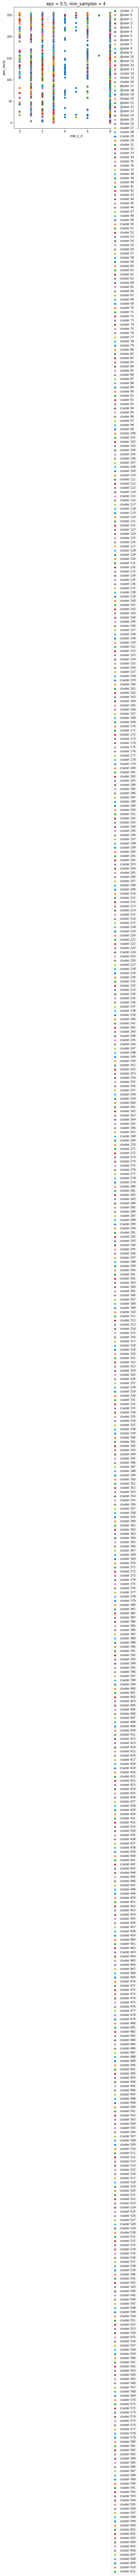

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
for i in range(-1, df_test['cluster'].max() + 1):
    plt.scatter(df_test.loc[df_test['cluster'] == i, 'cop_c_x'], df_test.loc[df_test['cluster'] == i, 'zon_mcls'], 
                    label = 'cluster ' + str(i))

plt.legend()
plt.title('eps = 0.5, min_samples = 4', size = 15)
plt.xlabel('cop_c_x', size = 12)
plt.ylabel('zon_mcls', size = 12)
plt.show()

In [32]:
df_test

,cop_c_x,zon_mcls,cluster
0,0,147,0
1,0,147,0
2,0,147,0
3,0,147,0
4,0,147,0
...,...,...,...
29995,0,142,2
29996,0,142,2
29997,0,142,2
29998,0,142,2
